In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import sounddevice as sd
from scipy.io import wavfile
from scipy import signal

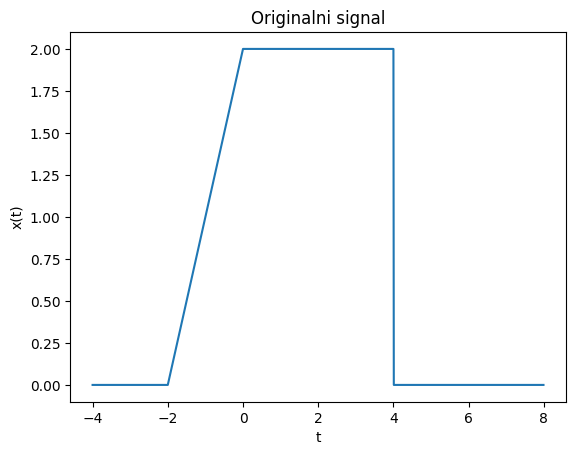

In [2]:
start_t=-4
d_t=0.01
end_t=8
t=np.arange(start_t, end_t, d_t)
x =(t+2)*((t>-2)*(t<0))+2*(t>=0) *(t<=4)

plt.figure()
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Originalni signal')
plt.show()


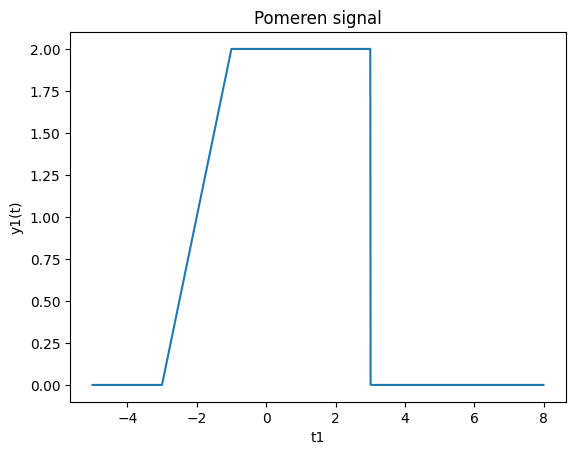

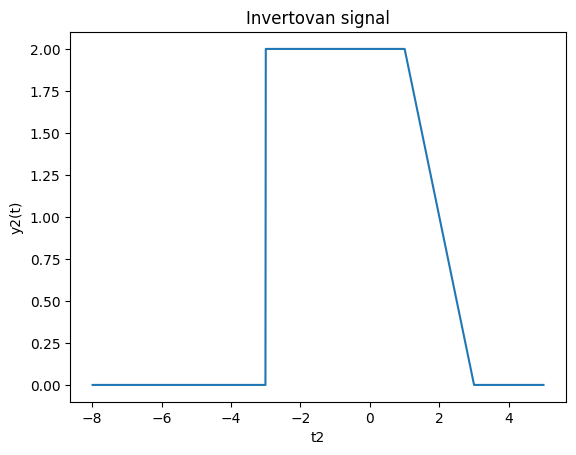

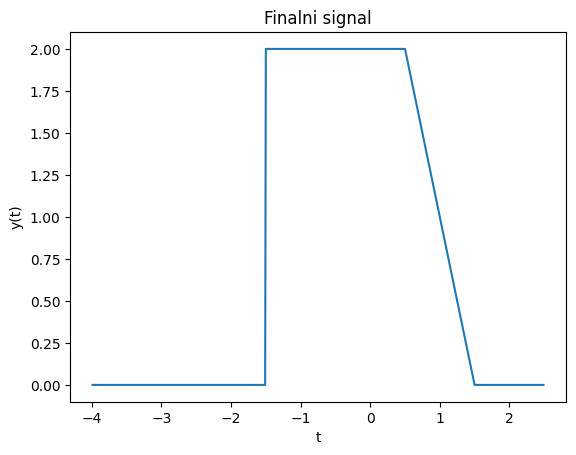

In [3]:

t0=1
skaliranje=2

# 1. pomeranje
y1 = np.concatenate((x,np.zeros(int(t0/d_t)))) # kasnjenje
# potrebno je prosiriti vremensku osu (ili skratiti x) zbog iscrtavanja
t1 = np.concatenate((np.arange(t[0]-t0, t[0], d_t),t))
plt.figure()
plt.plot(t1,y1)
plt.xlabel('t1')
plt.ylabel('y1(t)')
plt.title('Pomeren signal')
plt.show()

# 2. inverzija
y2 = y1[::-1]
t2=-t1[::-1]
plt.figure()
plt.plot(t2,y2)
plt.xlabel('t2')
plt.ylabel('y2(t)')
plt.title('Invertovan signal')
plt.show()


# 3. skaliranje
y3 = y2[1:-1:skaliranje] # ubrzavanje
t3 = t2[1:-1:skaliranje]/skaliranje
plt.figure()
plt.plot(t3,y3)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Finalni signal')
plt.show()


In [ ]:
plt.figure()
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Originalni signal')
plt.show()

t0=3
skaliranje=1/2

# 1. pomeranje
y1 = np.concatenate((np.zeros(int(t0/d_t)),x)) # kasnjenje
# potrebno je prosiriti vremensku osu (ili skratiti x) zbog iscrtavanja
t1 = np.concatenate((t, np.arange(t[-1]+d_t, t[-1]+t0+d_t, d_t)))
plt.figure()
plt.plot(t1,y1)
plt.xlabel('t1')
plt.ylabel('y1(t)')
plt.title('Pomeren signal')
plt.show()


# 2. sklaliranje
N = len(y1)
t2=np.arange(t1[0]/skaliranje, t1[-1]/skaliranje, d_t)
y2 = np.interp(t2, t1/skaliranje, y1)
plt.figure()
plt.plot(t2,y2)
plt.xlabel('t2')
plt.ylabel('y2(t)')
plt.title('Skaliran signal')
plt.show()




In [ ]:
# kod realnih signala, poput govornog, nema smisla razmatrati negativno vreme odnosno treba ih posmatrati od t=0 nadalje 


# snimanje i analiza zvucnog signala
samplerate = 44100  # ucestanost odabiranja
duration = 3  # trajanje snimka

myrecording = sd.rec(int(duration * samplerate), samplerate=samplerate, channels=1)
sd.wait()  # ceka dok se zavrsi snimanje
wavfile.write('sekvenca.wav', samplerate, myrecording)  # cuva se fajl po odgovarajucim imenom

samplerate, data = wavfile.read('./sekvenca.wav')

dt=1/samplerate
t=np.arange(0,dt*len(data),dt)
chanel1=data # chanel1=data[:,1] ako ima dva kanala
plt.figure()
plt.plot(t,chanel1)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Audio signal')
plt.show()


# energija signala je veoma bitna karakteristika signala, a definisana je kao Ex=sum[k=-inf,inf](x^2(k))

# govorni signal spada u one signale koji su dinamicni i brzo menjaju svoje
# karakeristike, zbog toga se njegove karakteristike cesto posmatraju u 
# takozvanim prozorima, tj.kratkim intervalima vremena, od oko 20-30ms. Upravo
# ova karakteristika moze da pomogne oko tzv. segmentacije govora, tj.
# izdvajanja reci koristeci adekvatno izabrane pragove. Realizacija takvog
# jednostavnog algoritma ce biti predmet domaceg zadatka

wl = int(samplerate*20e-3) # prozor od 20 milisekundi
E = np.zeros(len(chanel1)) # energija
for i in range(wl,len(chanel1)):
    E[i] = sum(chanel1[i-wl:i]**2)      # suma kvadrata prethodnih wl odbiraka
plt.figure()    
plt.plot(t,E)
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Energija audio signala')
plt.show()

In [ ]:
sd.play(data, samplerate)

In [ ]:

samplerate_sekvenca, sekvenca = wavfile.read('./sekvenca.wav')
#sekvenca=sekvenca[:,1]
dt=1/samplerate_sekvenca
t=np.arange(0,dt*len(sekvenca),dt)
plt.figure()
plt.plot(t,sekvenca)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Audio signal')
plt.show()

samplerate_impulsni, impulsni_odziv = wavfile.read('./impulses_airwindows_RoomMedium.wav')
impulsni_odziv=impulsni_odziv/max(np.absolute(impulsni_odziv))
dt_i=1/samplerate_impulsni
t_i=np.arange(0,dt*len(impulsni_odziv),dt_i)
plt.figure()
plt.plot(t_i,impulsni_odziv)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Impulsni odziv')
plt.show()

odziv=np.convolve(sekvenca,impulsni_odziv)
odziv=odziv/max(np.absolute(odziv))
dt_o=1/samplerate_impulsni
t_o=np.arange(0,dt*len(odziv),dt_o)
plt.figure()
plt.plot(t_o,odziv)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Konvolucija')
plt.show()


In [ ]:
sd.play(sekvenca, samplerate_sekvenca)


In [ ]:
sd.play(impulsni_odziv, samplerate_impulsni)


In [ ]:
sd.play(odziv, samplerate_sekvenca)


In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('./peppers.png')
img = rgb2gray(img)
plt.figure()
imgplot = plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

# Blur
K_blur=np.ones((3, 3))*1/9
img_blur=signal.convolve2d(img, K_blur, mode='same').clip(0,1)
plt.figure()
imgplot = plt.imshow(img_blur, cmap=plt.get_cmap('gray'))
plt.show()

# Sharp

K_sharp=np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
img_sharp=signal.convolve2d(img, K_sharp, mode='same').clip(0,1)
plt.figure()
imgplot = plt.imshow(img_sharp, cmap=plt.get_cmap('gray'))
plt.show()


In [ ]:
# Furijeovi redovi: razmatra se signal koji je unipolarna povorka cetvrtki periode 2s,
# izracunati su koeficijenti Furijeovog reda koji iznose
t=np.arange(-2,2,0.01)
x = 1*((t>=-2 )* (t<-1)) + 1*((t>=0) * (t<1))
plt.figure()
plt.plot(t,x) 
plt.show() 

In [ ]:

N = 50
pi=np.pi
w0 = pi
k=np.arange(-N,N+1)
ak = 1/(1j*2*k*pi)*(1-np.exp(-1j*k*pi))
ak[N]=0.5 # a0=0.5 (srednja vrednost signala - DC komponenta)

plt.figure()
plt.stem(k, np.absolute(ak))
plt.xlabel('k')
plt.title('Amplitudski linijski spektar')
plt.show()

plt.figure()
plt.stem(k, np.angle(ak))
plt.xlabel('k')
plt.title('Fazni linijski spektar')
plt.show()


In [ ]:

t=np.arange(-2,2,0.01)
x = 1*((t>=-2 )* (t<-1)) + 1*((t>=0) * (t<1))
N=50
x1=np.zeros(len(t))
for i in range(len(t)):
    x1[i]=np.absolute(ak[N])
    for k in range(1,N+1):
        x1[i]=x1[i]+2*np.absolute(ak[k+N])*np.cos((k)*w0*t[i]+np.angle(ak[k+N]))
plt.figure()
plt.plot(t,x)
plt.plot(t,x1)
plt.show()


In [ ]:

N = 10
pi=np.pi
w0 = pi
k=np.arange(-N,N+1)
ak = 1/(1j*2*k*pi)*(1-np.exp(-1j*k*pi))
ak[N]=0.5 # a0=0.5 (srednja vrednost signala - DC komponenta)
t=np.arange(-2,2,0.01)
x = 1*((t>=-2 )* (t<-1)) + 1*((t>=0) * (t<1))
x2=np.zeros(len(t))
for i in range(len(t)):
    x2[i]=np.absolute(ak[N])
    for k in range(1,N+1):
        x2[i] = x2[i] + 2*np.absolute(ak[k+N])*np.cos((k)*w0*t[i]+np.angle(ak[k+N]))   
plt.figure()        
plt.plot(t,x)        
plt.plot(t,x2)
plt.show()

In [ ]:
plt.figure()
plt.plot(t,x) 
plt.plot(t,x1)
plt.plot(t,x2)
plt.show() 

In [ ]:
# ako zelimo da preskocimo ak[0], pa da ga umetnemo na kraju
#k = np.arange(-N,0)
#ak_neg = 1/(1j*2*k*pi)*(1-np.exp(-1j*k*pi))
#k = np.arange(1,N+1)
#ak_pos = 1/(1j*2*k*pi)*(1-np.exp(-1j*k*pi))
#a0=0.5
#k=range(-N,N+1)
#ak=np.concatenate((ak_neg,np.array([a0])))
#ak=np.concatenate((ak,ak_pos))